In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create path
path=r'C:\Users\37mhu\Documents\Instacart Basket Analysis'

In [3]:
#import  data
cust_ord_prod=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','custs_ords_prods.pkl'))

In [4]:
cust_ord_prod=cust_ord_prod.drop(columns=['Unnamed: 0.1','Unnamed: 0_x','Unnamed: 0_y'])

#### Create Region Variable

In [6]:
region = []

for value in cust_ord_prod["STATE"]:
  if value in ('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey') :
    region.append("Northeast")
  elif value in ('Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
    region.append("Midwest")
  elif value in ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
    region.append("South")
  elif value in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
    region.append("West")  
  else:
    region.append("N/A")

In [7]:
cust_ord_prod['region']=region

In [8]:
region_spend = pd.crosstab(cust_ord_prod['region'], cust_ord_prod['spend_flag'], dropna = False)

In [9]:
print(region_spend)

spend_flag  high spender  low spender
region                               
Midwest           156149      7448127
Northeast         108349      5620298
South             210232     10592165
West              160817      8140104


#### Create Flag for Low-Activity Customers

In [11]:
cust_ord_prod['max_order'] = cust_ord_prod.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\37mhu\AppData\Local\Temp\ipykernel_14624\2785500530.py:1: FutureWarning: The provided callable <function max at 0x0000027D1C6E6160> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cust_ord_prod['max_order'] = cust_ord_prod.groupby(['user_id'])['order_number'].transform(np.max)


In [12]:
cust_ord_prod.loc[cust_ord_prod['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
cust_ord_prod.loc[cust_ord_prod['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [13]:
hi_activity=cust_ord_prod.drop(cust_ord_prod[cust_ord_prod['activity_flag'] =='low-activity customer'].index)

In [14]:
hi_activity.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'dependants',
       'fam_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'hour_order_placed', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spend',
       'spend_flag', 'order_frequency', 'frequency_flag', 'region',
       'activity_flag'],
      dtype='object')

#### Export dataset without low-activity customers

In [16]:
hi_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','hi_activity_customers.pkl'))

#### Create Customer Profiling variables & Visualizations

##### Create age and income range variables

In [19]:
hi_activity.loc[(hi_activity['Age'] >= 18) & (hi_activity['Age'] < 25), 'age_range'] = 'young adult'
hi_activity.loc[(hi_activity['Age'] >= 25) & (hi_activity['Age'] < 40), 'age_range'] = 'adult'
hi_activity.loc[(hi_activity['Age'] >= 40) & (hi_activity['Age'] < 65), 'age_range'] = 'middle aged'
hi_activity.loc[hi_activity['Age'] >= 65, 'age_range'] = 'senior'

In [20]:
hi_activity.loc[(hi_activity['income'] < 56600), 'income_range'] = 'low income'
hi_activity.loc[(hi_activity['income'] >= 56600) & (hi_activity['income'] < 169801), 'income_range'] = 'middle income'
hi_activity.loc[(hi_activity['income'] >= 169801), 'income_range'] = 'high income'

##### Create dataset of unique users

In [22]:
distinct_users=hi_activity.drop_duplicates(subset='user_id')

##### Profiling based on age range

In [24]:
age_range_count=distinct_users['age_range'].value_counts(dropna=False)

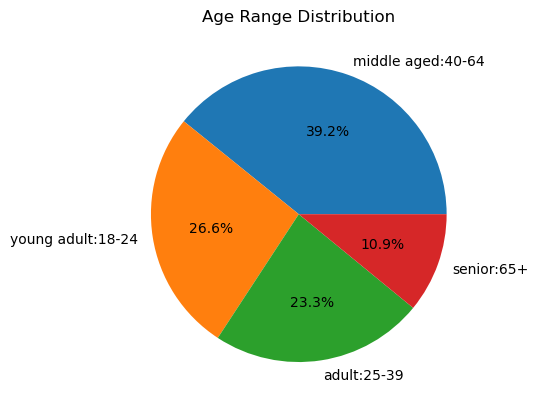

In [25]:
age_range_pie=age_range_count.plot.pie(autopct='%1.1f%%', labels=['middle aged:40-64','young adult:18-24','adult:25-39','senior:65+'] )
plt.ylabel('') 
plt.title('Age Range Distribution')
plt.show()

In [26]:
#export visualization
age_range_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'age_range_pie.png'))

##### Profiling based on income range

In [28]:
income_range_count=distinct_users['income_range'].value_counts(dropna=False)

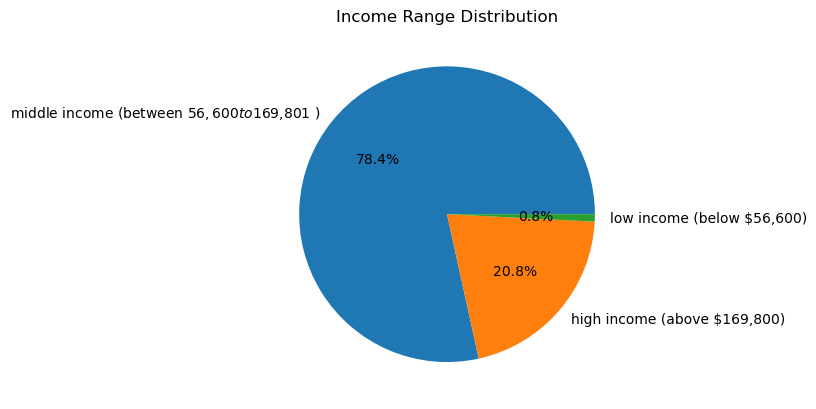

In [29]:
income_range_pie=income_range_count.plot.pie(autopct='%1.1f%%',  labels=['middle income (between $56,600 to $169,801 )','high income (above $169,800)','low income (below $56,600)'] )
plt.ylabel('') 
plt.title('Income Range Distribution')
plt.show()

In [30]:
#export visualization
income_range_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'income_range_pie.png'))

##### Create profiling based on family status

In [32]:
fam_status_count=distinct_users['fam_status'].value_counts(dropna=False)

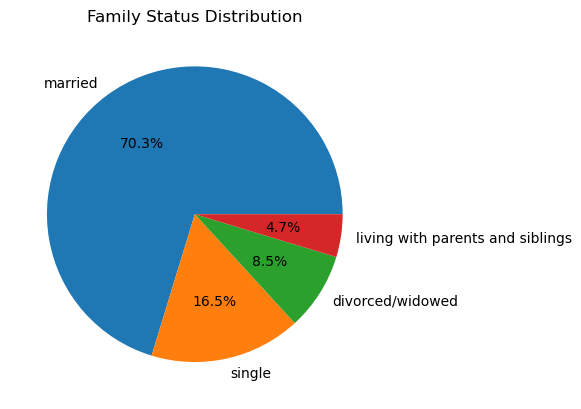

In [33]:
fam_status_pie=fam_status_count.plot.pie(autopct='%1.1f%%')
plt.ylabel('') 
plt.title('Family Status Distribution')
plt.show()

In [34]:
#export visualization
fam_status_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'fam_status_pie.png'))

##### Create profiling based on number of dependants

In [36]:
dependant_count=distinct_users['dependants'].value_counts(dropna=False)

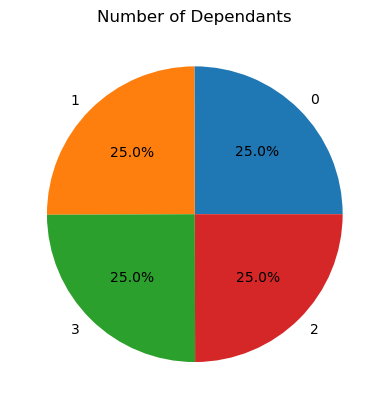

In [37]:
dependant_pie=dependant_count.plot.pie(autopct='%1.1f%%')
plt.title('Number of Dependants')
plt.ylabel('') 
plt.show()

In [38]:
#export visualization
dependant_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'dependant_pie.png'))

##### Create profiling based on income and age

In [40]:
income_age=pd.crosstab(distinct_users['income_range'], distinct_users['age_range'], dropna = False)

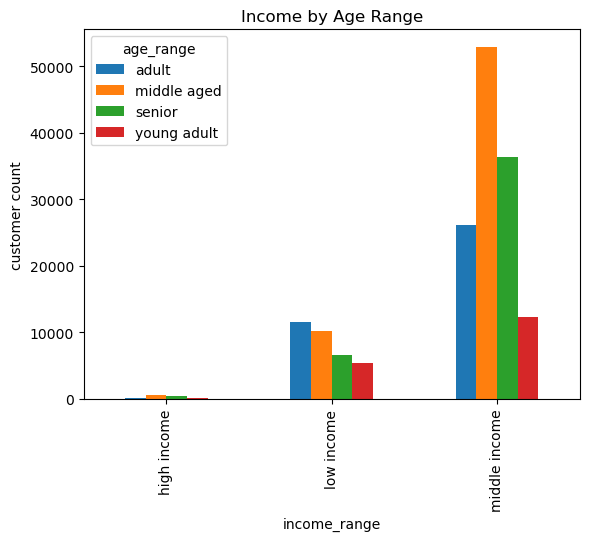

In [41]:
income_age_bar=income_age.plot.bar()
plt.title('Income by Age Range')
plt.ylabel('customer count')
plt.show()

In [42]:
#export visualization
income_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'income_age_bar.png'))

##### Create profiling based on income and family status

In [44]:
income_fam=pd.crosstab(distinct_users['income_range'], distinct_users['fam_status'], dropna = False)

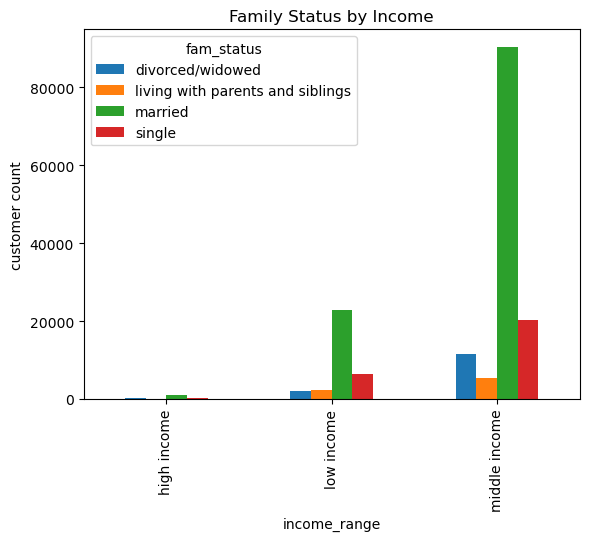

In [45]:
income_fam_bar=income_fam.plot.bar()
plt.title('Family Status by Income')
plt.ylabel('customer count')
plt.show()

In [46]:
#export visualization
income_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'income_fam_bar.png'))

##### Create profiling based on income and dependants

In [48]:
income_dependants=pd.crosstab(distinct_users['dependants'], distinct_users['income_range'], dropna = False)

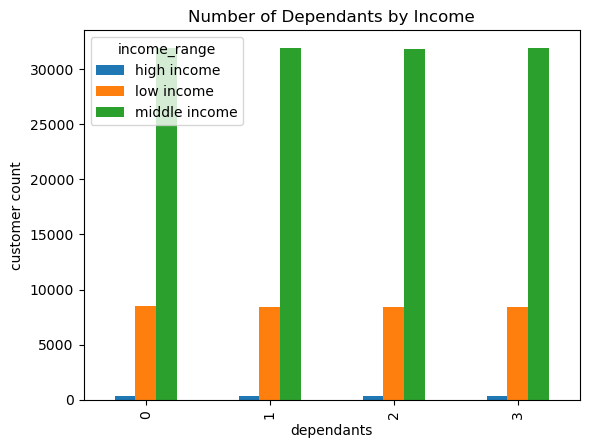

In [49]:
income_dependants_bar=income_dependants.plot.bar()
plt.title('Number of Dependants by Income')
plt.ylabel('customer count')
plt.show()

In [50]:
#export visualization
income_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'income_dependants_bar.png'))

##### Create profiling based on age range and family status

In [52]:
age_fam=pd.crosstab(distinct_users['age_range'], distinct_users['fam_status'], dropna = False)

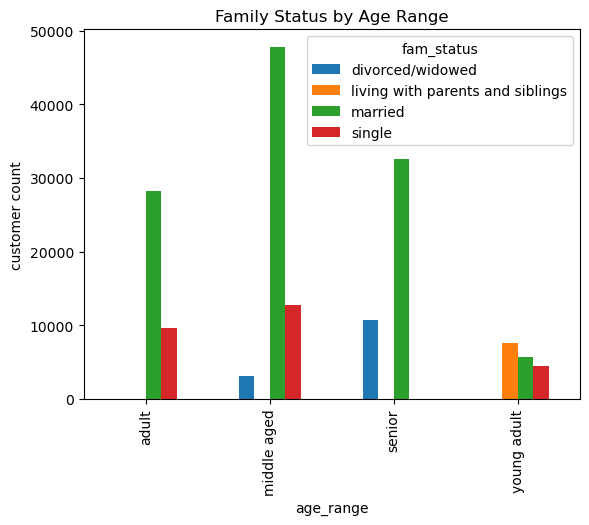

In [53]:
age_fam_bar=age_fam.plot.bar()
plt.title('Family Status by Age Range')
plt.ylabel('customer count')
plt.show()

In [54]:
#export visualization
age_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'age_fam_bar.png'))

##### Create profiling based on age range and dependants

In [56]:
age_dependants=pd.crosstab(distinct_users['age_range'], distinct_users['dependants'], dropna = False)

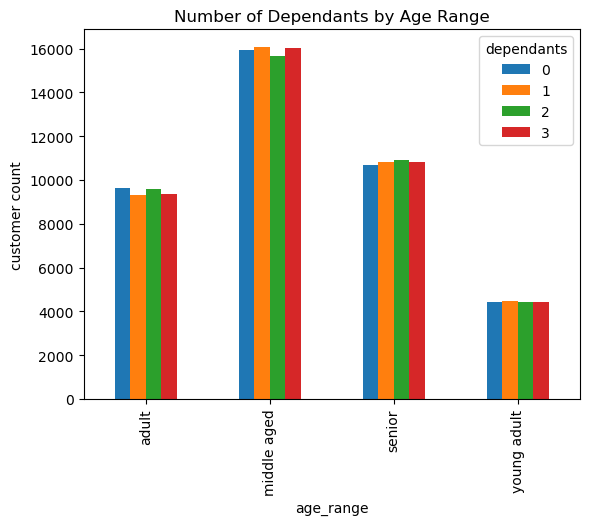

In [57]:
age_dependants_bar=age_dependants.plot.bar()
plt.title('Number of Dependants by Age Range')
plt.ylabel('customer count')
plt.show()

In [58]:
#export visualization
age_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'age_dependants_bar.png'))

##### Create profiling based on family status and dependants

In [60]:
fam_dependants=pd.crosstab(distinct_users['dependants'], distinct_users['fam_status'], dropna = False)

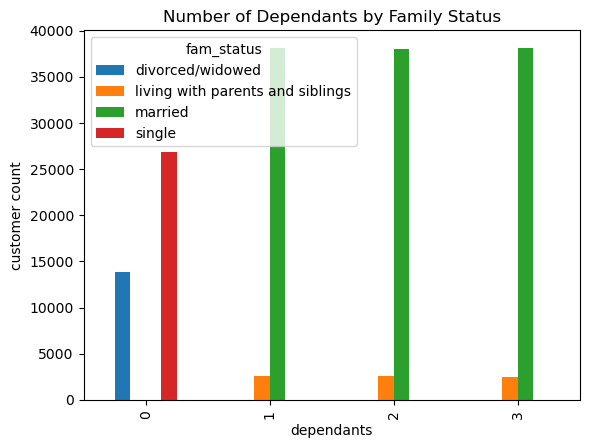

In [61]:
fam_dependants_bar=fam_dependants.plot.bar()
plt.title('Number of Dependants by Family Status')
plt.ylabel('customer count')
plt.show()

In [62]:
#export visualization
fam_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'fam_dependants_bar.png'))

##### Create profiling based on age range and number of orders placed

In [64]:
age_ords=hi_activity.groupby('age_range').agg({'order_number': ['count']})

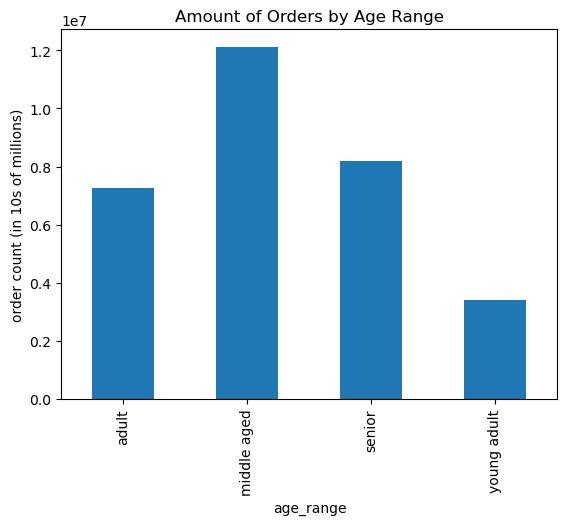

In [65]:
age_ords_bar=age_ords.plot.bar(legend=False)
plt.title('Amount of Orders by Age Range')
plt.ylabel('order count (in 10s of millions)')
plt.show()

In [66]:
#export visualization
age_ords_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'age_ords_bar.png'))

##### Create profiling based on age range and amount spent

In [68]:
age_prices=hi_activity.groupby('age_range').agg({'prices': ['sum']})

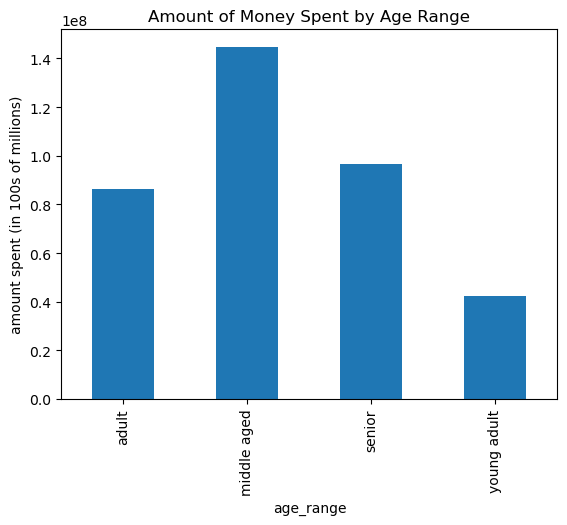

In [69]:
age_prices_bar=age_prices.plot.bar(legend=False)
plt.title('Amount of Money Spent by Age Range')
plt.ylabel('amount spent (in 100s of millions)')
plt.show()

In [70]:
#export visualization
age_prices_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'age_prices_bar.png'))

##### Create profiling based on income range and number of orders placed

In [72]:
income_ords=hi_activity.groupby('income_range').agg({'order_number': ['count']})

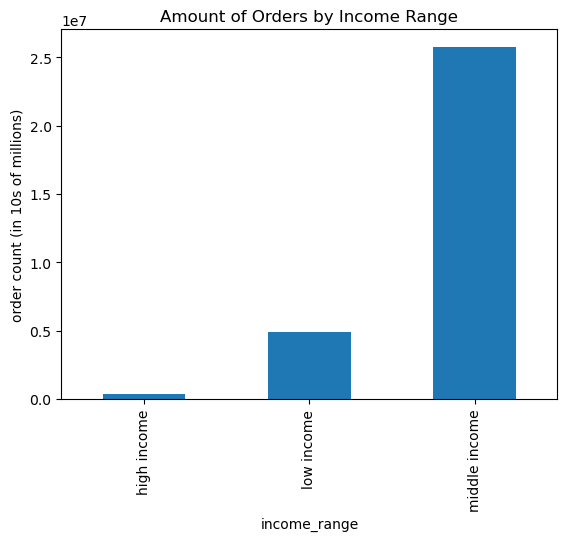

In [73]:
income_ords_bar=income_ords.plot.bar(legend=False)
plt.title('Amount of Orders by Income Range')
plt.ylabel('order count (in 10s of millions)')
plt.show()

In [74]:
#export visualization
income_ords_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'income_ords_bar.png'))

##### Create profiling based on income range and total amount spent

In [76]:
income_prices=hi_activity.groupby('income_range').agg({'prices': ['sum']})

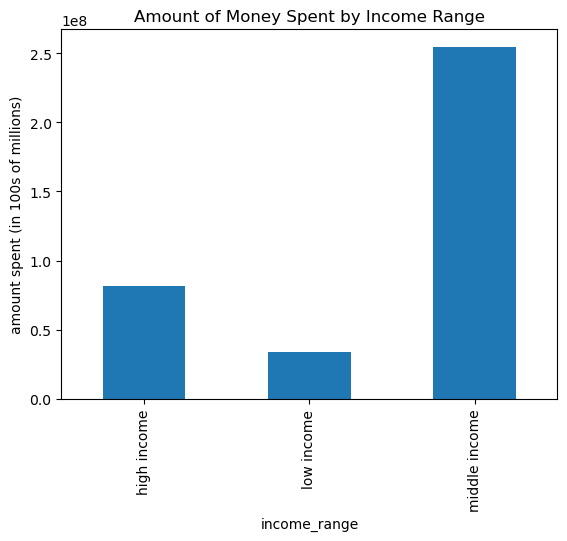

In [77]:
income_prices_bar=income_prices.plot.bar(legend=False)
plt.title('Amount of Money Spent by Income Range')
plt.ylabel('amount spent (in 100s of millions)')
plt.show()

In [78]:
#export visualization
income_prices_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'income_prices_bar.png'))

##### Create profiling based on family status and number of orders placed

In [80]:
fam_ords=hi_activity.groupby('fam_status').agg({'order_number': ['count']})

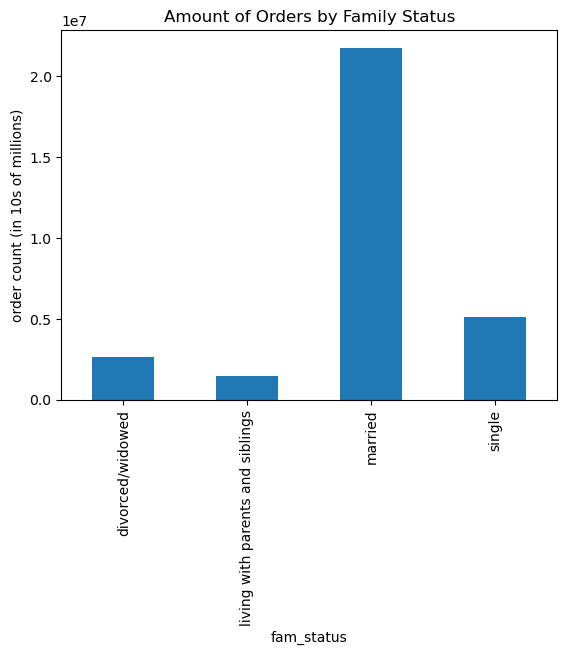

In [81]:
fam_ords_bar=fam_ords.plot.bar(legend=False)
plt.title('Amount of Orders by Family Status')
plt.ylabel('order count (in 10s of millions)')
plt.show()

In [82]:
#export visualization
fam_ords_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'fam_ords_bar.png'))

##### Create profiling based on family status and total amount spent

In [84]:
fam_prices=hi_activity.groupby('fam_status').agg({'prices': ['sum']})

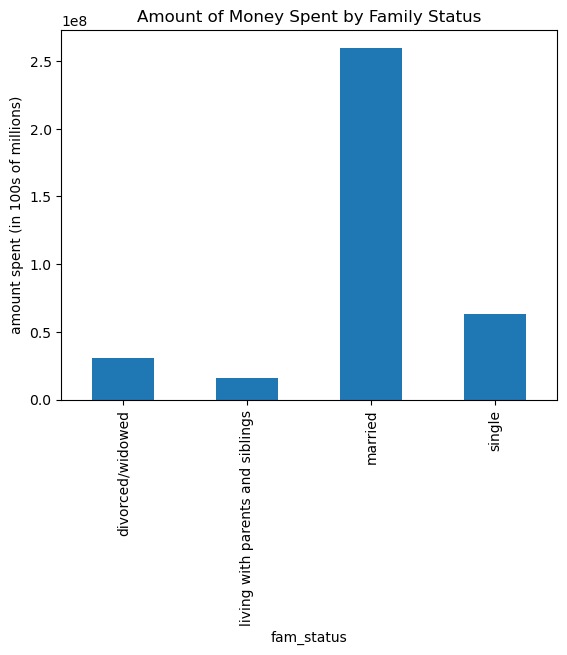

In [85]:
fam_prices_bar=fam_prices.plot.bar(legend=False)
plt.title('Amount of Money Spent by Family Status')
plt.ylabel('amount spent (in 100s of millions)')
plt.show()

In [86]:
#export visualization
fam_prices_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'fam_prices_bar.png'))

##### Create profiling based on number of dependants and amount of orders placed

In [88]:
dependants_ords=hi_activity.groupby('dependants').agg({'order_number': ['count']})

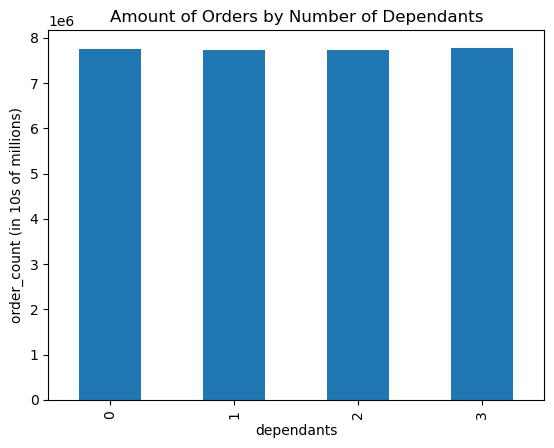

In [89]:
dependants_ords_bar=dependants_ords.plot.bar(legend=False)
plt.title('Amount of Orders by Number of Dependants')
plt.ylabel('order_count (in 10s of millions)')
plt.show()

In [90]:
#export visualization
dependants_ords_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'dependants_ords_bar.png'))

##### Create profiling based on number of dependants and total amount spent

In [92]:
dependants_prices=hi_activity.groupby('dependants').agg({'prices': ['sum']})

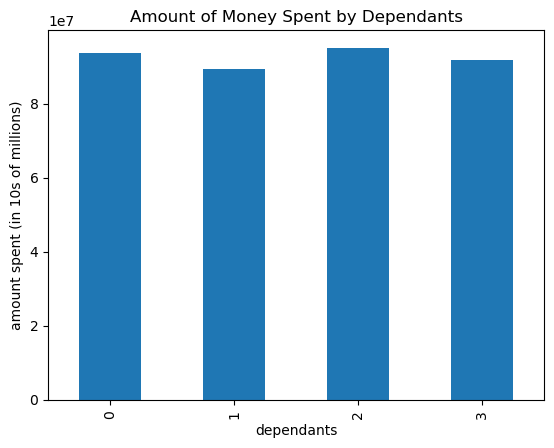

In [93]:
dependants_prices_bar=dependants_prices.plot.bar(legend=False)
plt.title('Amount of Money Spent by Dependants')
plt.ylabel('amount spent (in 10s of millions)')
plt.show()

In [94]:
#export visualization
dependants_prices_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'dependants_prices_bar.png'))

##### Create profiling based on age range and hour order placed

In [96]:
age_hour=pd.crosstab(hi_activity['hour_order_placed'], hi_activity['age_range'], dropna = False)

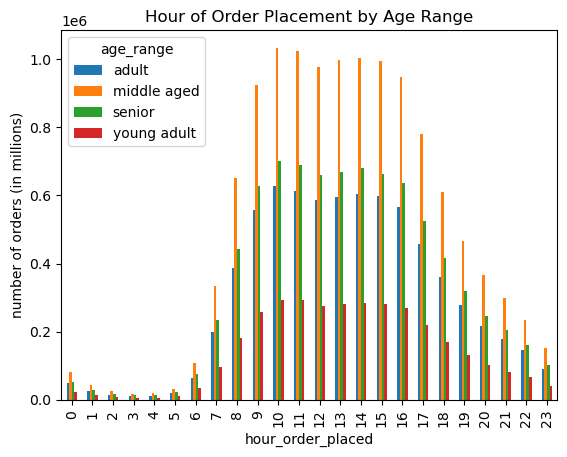

In [97]:
age_hour_bar=age_hour.plot.bar()
plt.title('Hour of Order Placement by Age Range')
plt.ylabel('number of orders (in millions)')
plt.show()

In [98]:
#export visualization
age_hour_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'age_hour_bar.png'))

##### Create profiling based on age range and day order placed

In [100]:
age_day=pd.crosstab(hi_activity['orders_day_of_week'], hi_activity['age_range'], dropna = False)

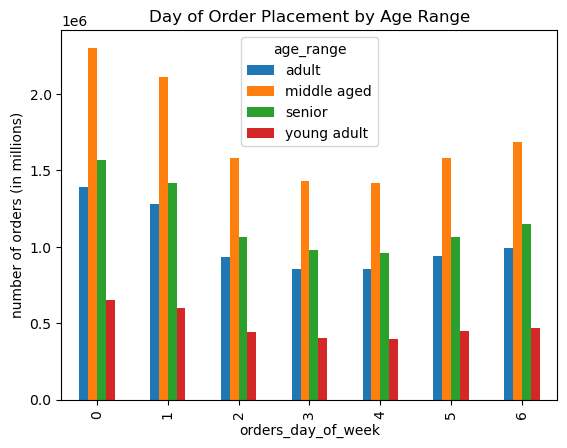

In [101]:
age_day_bar=age_day.plot.bar()
plt.title('Day of Order Placement by Age Range')
plt.ylabel('number of orders (in millions)')
plt.show()

In [102]:
#export visualization
age_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'age_day_bar.png'))

##### Create profiling based on income range and hour order placed

In [104]:
income_hour=pd.crosstab(hi_activity['hour_order_placed'], hi_activity['income_range'], dropna = False)

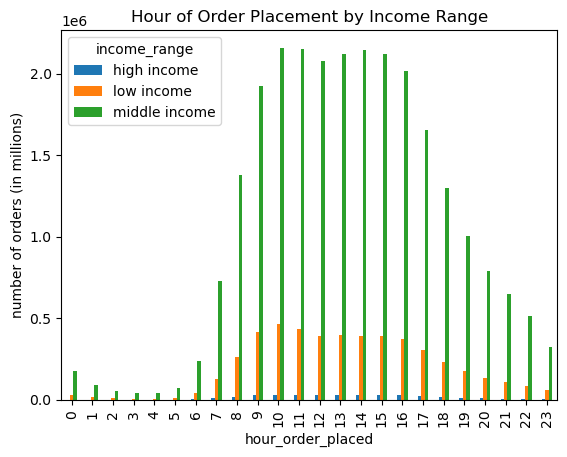

In [105]:
income_hour_bar=income_hour.plot.bar()
plt.title('Hour of Order Placement by Income Range')
plt.ylabel('number of orders (in millions)')
plt.show()

In [106]:
#export visualization
income_hour_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'income_hour_bar.png'))

##### Create profiling based on income range and day order placed

In [108]:
income_day=pd.crosstab(hi_activity['orders_day_of_week'], hi_activity['income_range'], dropna = False)

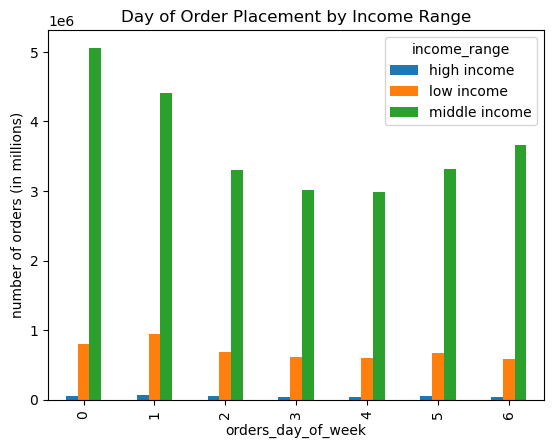

In [109]:
income_day_bar=income_day.plot.bar()
plt.title('Day of Order Placement by Income Range')
plt.ylabel('number of orders (in millions)')
plt.show()

In [110]:
#export visualization
income_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'income_day_bar.png'))

##### Create profiling based on family status and hour order placed

In [112]:
fam_hour=pd.crosstab(hi_activity['hour_order_placed'], hi_activity['fam_status'], dropna = False)

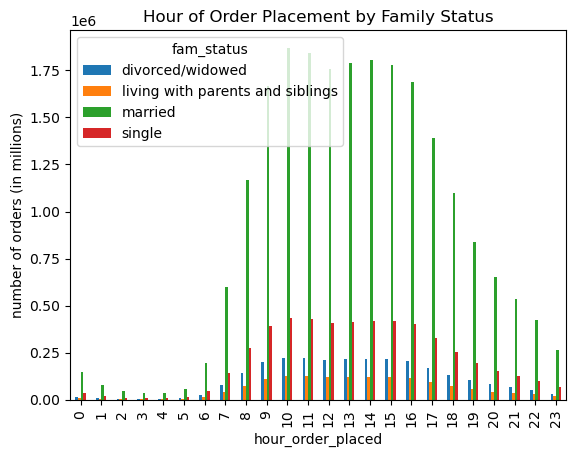

In [113]:
fam_hour_bar=fam_hour.plot.bar()
plt.title('Hour of Order Placement by Family Status')
plt.ylabel('number of orders (in millions)')
plt.show()

In [114]:
#export visualization
fam_hour_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'fam_hour_bar.png'))

##### Create profiling based on family status and day order placed

In [116]:
fam_day=pd.crosstab(hi_activity['orders_day_of_week'], hi_activity['fam_status'], dropna = False)

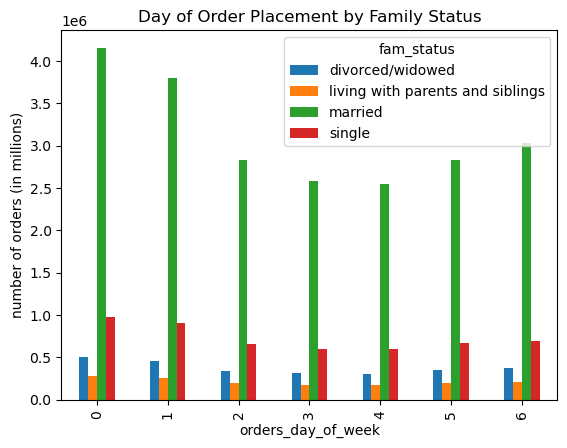

In [117]:
fam_day_bar=fam_day.plot.bar()
plt.title('Day of Order Placement by Family Status')
plt.ylabel('number of orders (in millions)')
plt.show()

In [118]:
#export visualization
fam_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'fam_day_bar.png'))

#### Aggregate the min/max/mean variables on a customer-profile level for usage frequency and expenditure

In [120]:
cust_usage_expenditure=hi_activity.groupby('user_id').agg({'order_number':['min','max','mean'],'prices': ['min','max','mean']})

In [121]:
cust_usage_expenditure

order_number                prices                
                 min max       mean    min   max      mean
user_id                                                   
1                  1  10   5.813559    1.0  14.0  6.367797
2                  1  14   8.035897    1.3  14.8  7.515897
3                  1  12   6.000000    1.3  14.4  8.197727
4                  1   5   2.888889    1.4  14.6  8.205556
7                  1  20   9.645631    1.1  23.2  7.466990
...              ...  ..        ...    ...   ...       ...
206203             1   5   2.983193    1.0  25.0  7.138655
206206             1  67  38.007018    1.1  14.8  7.646667
206207             1  16   8.116592    1.2  24.7  7.313453
206208             1  49  25.505170    1.1  21.6  8.366617
206209             1  13   6.937984    1.1  18.8  7.058915

[162633 rows x 6 columns]

#### Compare customer profiles with regions and departments

In [123]:
#Import department dataset
depts=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [124]:
#Rename column
depts.rename(columns={'Unnamed: 0':'department_id'}, inplace=True)

In [125]:
#Merge customer dataset with department dataset
custs_dept=hi_activity.merge(depts, on='department_id', how='left')

In [126]:
#Merge distinct customer dataset with department dataset
distinct_custs_dept=distinct_users.merge(depts, on='department_id', how='left')

In [127]:
dept_ords=custs_dept.groupby('department').agg({'order_number': ['count']})

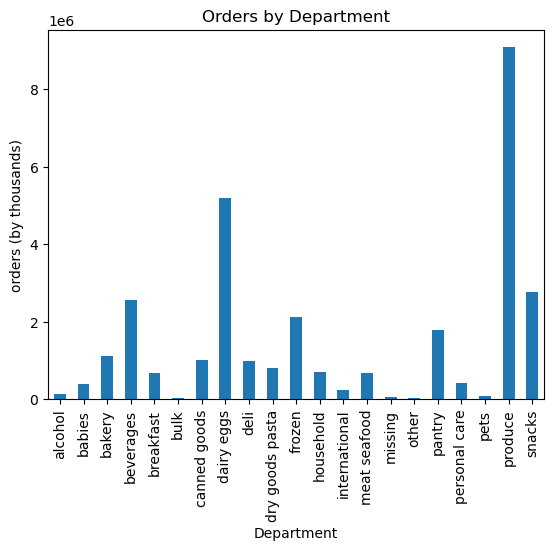

In [128]:
dept_ords_bar=dept_ords.plot.bar(legend=False)
plt.title('Orders by Department')
plt.xlabel('Department')
plt.ylabel('orders (by thousands)')
plt.show()

In [129]:
#export visualization
dept_ords_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'dept_ords_bar.png'))

##### Compare customers' age range by region

In [132]:
age_region=pd.crosstab(distinct_custs_dept['region'], distinct_custs_dept['age_range'], dropna = False)

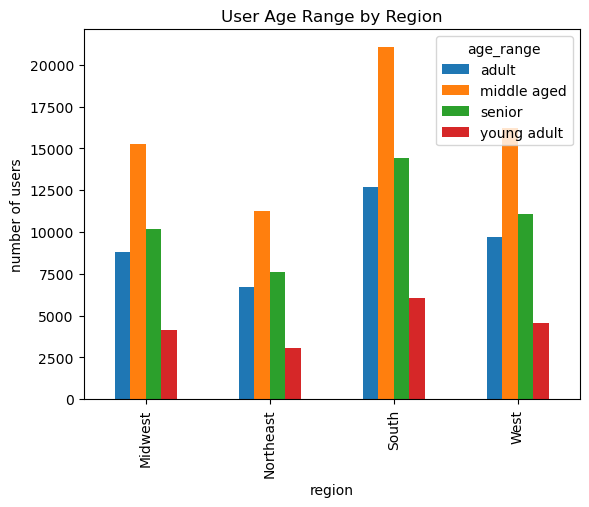

In [134]:
age_region_bar=age_region.plot.bar()
plt.title('User Age Range by Region')
plt.ylabel('number of users')
plt.show()

In [135]:
#export visualization
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'age_region_bar.png'))

##### Compare customers' income range by region

In [150]:
income_region=pd.crosstab(distinct_custs_dept['income_range'], distinct_custs_dept['region'], dropna = False)

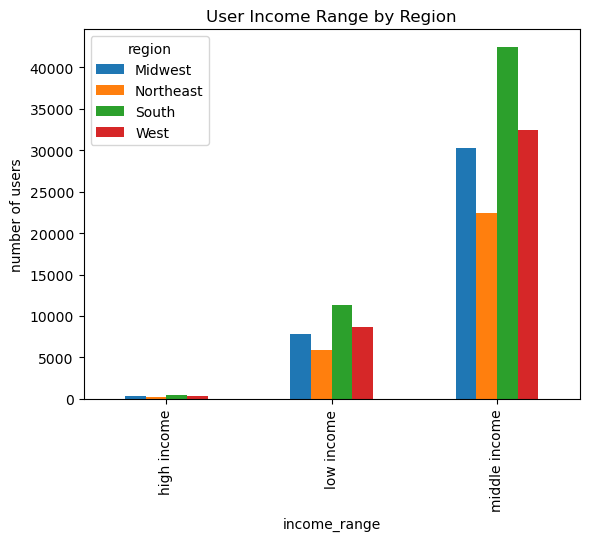

In [152]:
income_region_bar=income_region.plot.bar()
plt.title('User Income Range by Region')
plt.ylabel('number of users')
plt.show()

In [154]:
#export visualization
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'income_region_bar.png'))

##### Compare customer's family status by region

In [159]:
fam_region=pd.crosstab(distinct_custs_dept['fam_status'], distinct_custs_dept['region'], dropna = False)

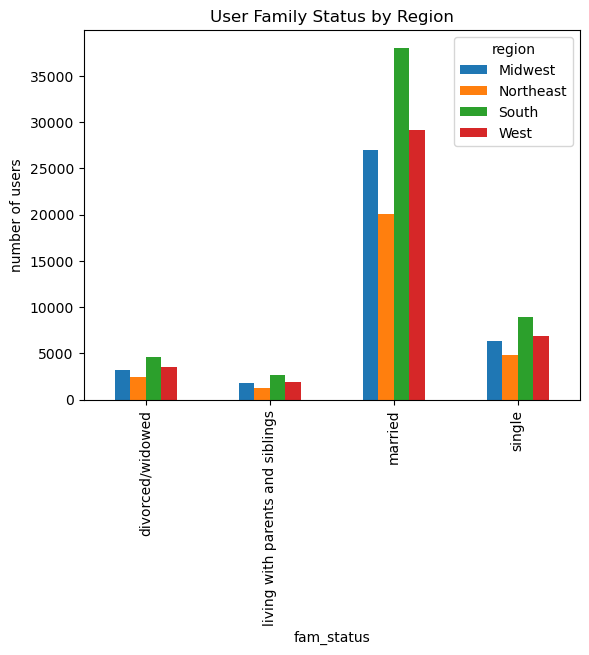

In [161]:
fam_region_bar=fam_region.plot.bar()
plt.title('User Family Status by Region')
plt.ylabel('number of users')
plt.show()

In [163]:
#export visualization
fam_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'fam_region_bar.png'))

##### Compare customer's age range by department of placed order

In [166]:
age_dept=pd.crosstab(custs_dept['department'], custs_dept['age_range'], dropna = False)

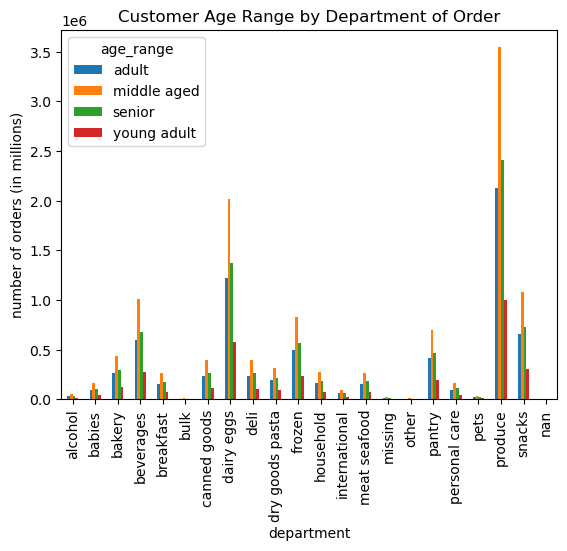

In [167]:
age_dept_bar=age_dept.plot.bar()
plt.title('Customer Age Range by Department of Order')
plt.ylabel('number of orders (in millions)')
plt.show()

In [168]:
#export visualization
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'age_dept_bar.png'))

##### Compare customer's income range by department of placed order

In [170]:
income_dept=pd.crosstab(custs_dept['department'], custs_dept['income_range'], dropna = False)

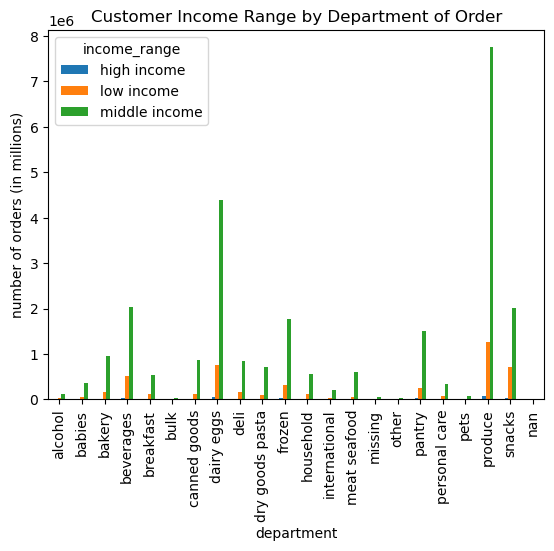

In [171]:
income_dept_bar=income_dept.plot.bar()
plt.title('Customer Income Range by Department of Order')
plt.ylabel('number of orders (in millions)')
plt.show()

In [172]:
#export visualization
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'income_dept_bar.png'))

##### Compare customer's family status by department of placed order

In [174]:
fam_dept=pd.crosstab(custs_dept['department'], custs_dept['fam_status'], dropna = False)

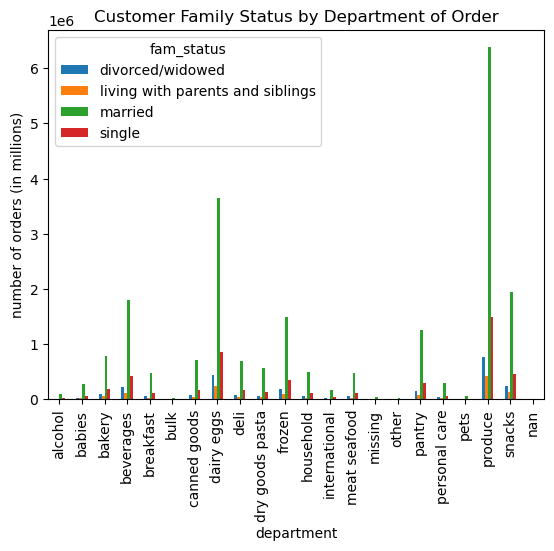

In [175]:
fam_dept_bar=fam_dept.plot.bar()
plt.title('Customer Family Status by Department of Order')
plt.ylabel('number of orders (in millions)')
plt.show()

In [176]:
#export visualization
fam_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'fam_dept_bar.png'))

##### Compare customer's region by department of placed order

In [181]:
region_dept=pd.crosstab(custs_dept['department'], custs_dept['region'], dropna = False)

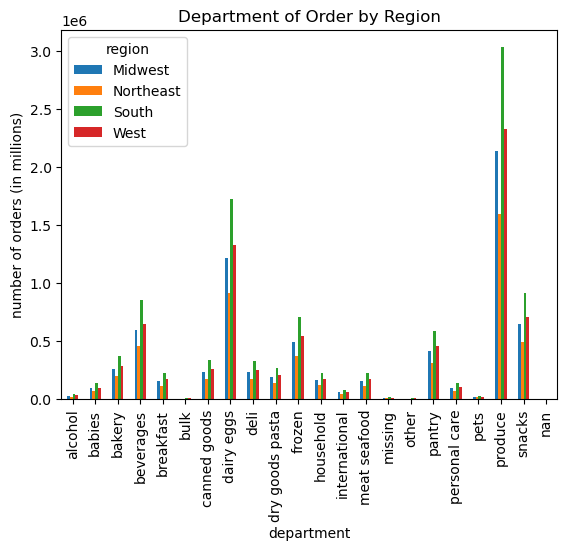

In [182]:
region_dept_bar=region_dept.plot.bar()
plt.title('Department of Order by Region')
plt.ylabel('number of orders (in millions)')
plt.show()

In [183]:
#export visualization
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'region_dept_bar.png'))

##### Compare total amount spent by hour

In [196]:
prices_hour=hi_activity.groupby('hour_order_placed').agg({'prices': ['sum']})

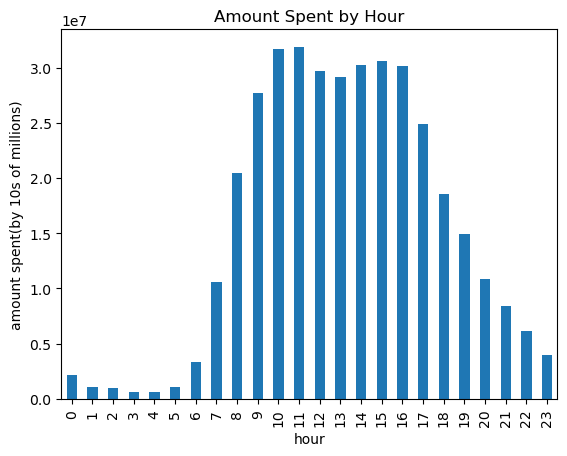

In [202]:
prices_hour_bar=prices_hour.plot.bar(legend=False)
plt.title('Amount Spent by Hour')
plt.xlabel('hour')
plt.ylabel('amount spent(by 10s of millions)')
plt.show()

In [204]:
#export visualization
prices_hour_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'prices_hour_bar.png'))

##### Compare customer loyalty to number of orders placed

In [206]:
loyalty_order_count=hi_activity.groupby('loyalty_flag').agg({'order_id': ['count']})

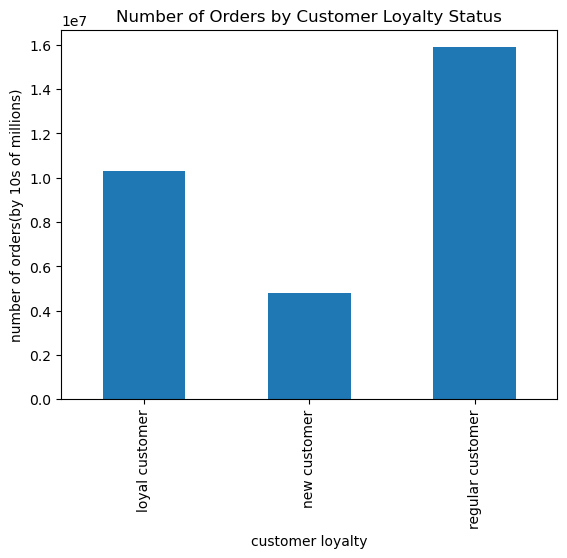

In [210]:
loyalty_order_bar=loyalty_order_count.plot.bar(legend=False)
plt.title('Number of Orders by Customer Loyalty Status')
plt.xlabel('customer loyalty')
plt.ylabel('number of orders(by 10s of millions)')
plt.show()

In [216]:
#export visualization
loyalty_order_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10 Visuals', 'loyalty_order_bar.png'))

In [218]:
#export final data set
custs_dept.to_pickle(os.path.join(path,'02 Data','Prepared Data','final.pkl'))